<a href="https://colab.research.google.com/github/atinsinghal97/dv-marketing-profiles/blob/master/DV_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import os

In [56]:
# from google.colab import drive
# drive.mount('/content/drive')

In [57]:
#data_file = '/content/drive/MyDrive/Colab- Datasets/DV/adult.data'
data_file = os.path.dirname(os.path.abspath("adult.data"))+"/dataset/adult.data"
data_file


'/Users/anilkhadwal/Downloads/data_visulalization/project/CSE578-marketing-profiles-visualization/dataset/adult.data'

# Data collection

In [58]:
column_name= ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
adult_data = pd.read_csv(data_file,names = column_name,header=None)
adult_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [59]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [60]:
adult_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Data Cleaning

In [61]:
non_int_columns = adult_data.select_dtypes(exclude=["number"]).columns
adult_data[non_int_columns] = adult_data[non_int_columns].applymap(lambda x: x.strip())

## REMOVE ROWS WITH ? CHARACTER AS VALUE FOR FEATURE

In [62]:
for col in adult_data:
    if len(adult_data[adult_data[col] == '?']) > 0:
        print("Identified column witn ? character :",col)
        adult_data = adult_data[adult_data[col] != '?']

Identified column witn ? character : workclass
Identified column witn ? character : occupation
Identified column witn ? character : native-country


/Users/anilkhadwal/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


# Data Correlation

In [63]:
correlation_data = adult_data.copy()
categorical_columns = adult_data.select_dtypes(exclude=["number"]).columns.tolist()
for i in categorical_columns:
    correlation_data[i] = correlation_data[i].astype('category').cat.codes

# 1. HEAT MAP

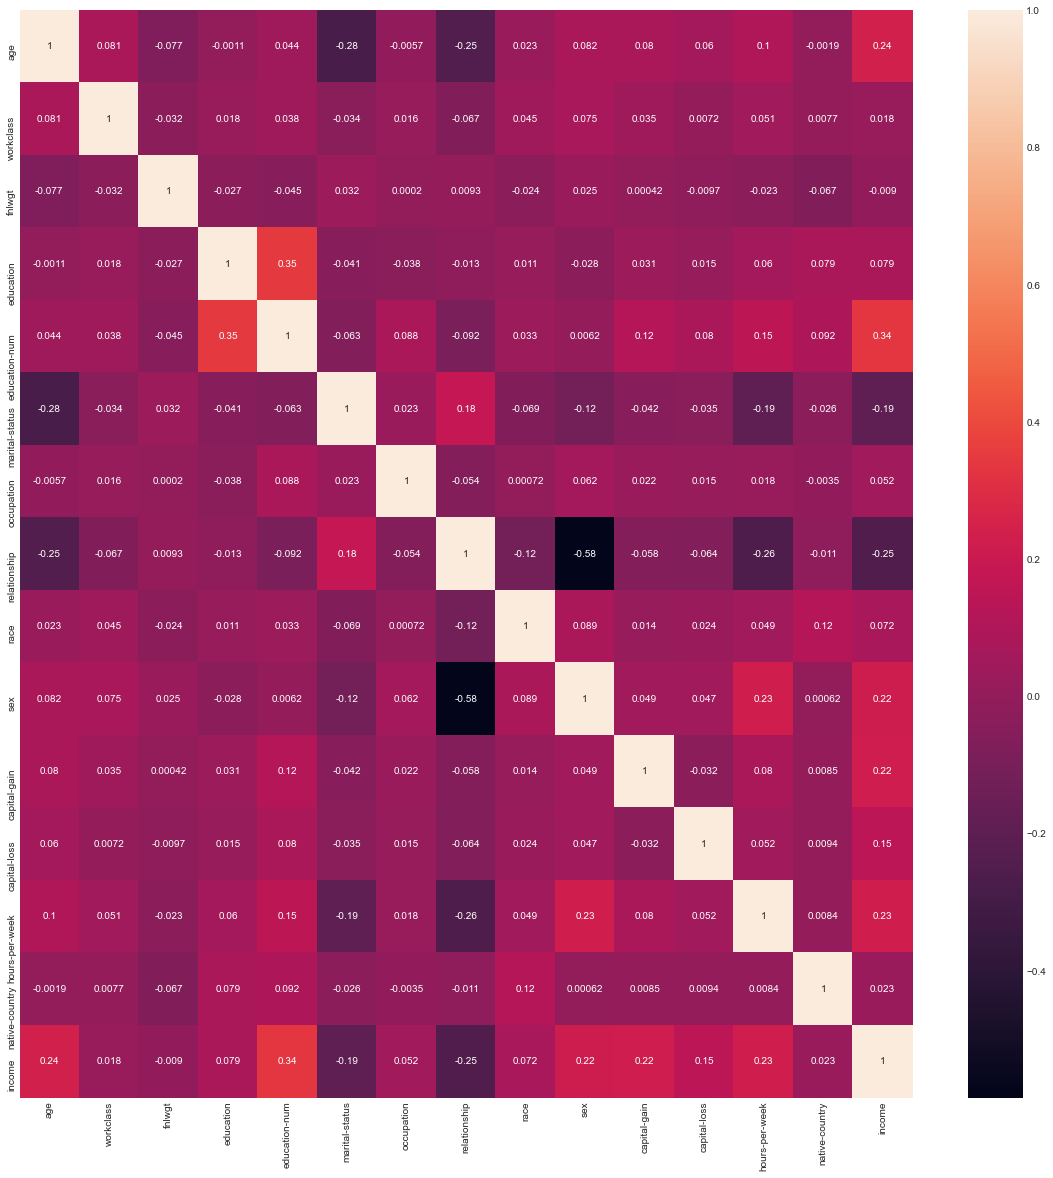

In [64]:
plt.rcParams['font.size'] = 10.0
plt.figure(figsize=(20,20))
sns.heatmap(correlation_data.corr(),annot=True)
plt.show()

# Finding features which have highest correlation with Income

In [65]:
correlation_data.corr()['income'].sort_values(ascending=False)

income            1.000000
education-num     0.335286
age               0.241998
hours-per-week    0.229480
capital-gain      0.221196
sex               0.216699
capital-loss      0.150053
education         0.078987
race              0.071658
occupation        0.051577
native-country    0.023268
workclass         0.018044
fnlwgt           -0.008957
marital-status   -0.193518
relationship     -0.251003
Name: income, dtype: float64

## Features selected to explore:
### 1. education-num
### 2. age
### 3. hours-per-week
### 4. capital-gain
### 5. sex
### 6. education
### 7. workclass
### 8. marital-status
### 9. relationship

# 2. CORRELATION MATRIX

<Figure size 2160x3600 with 0 Axes>

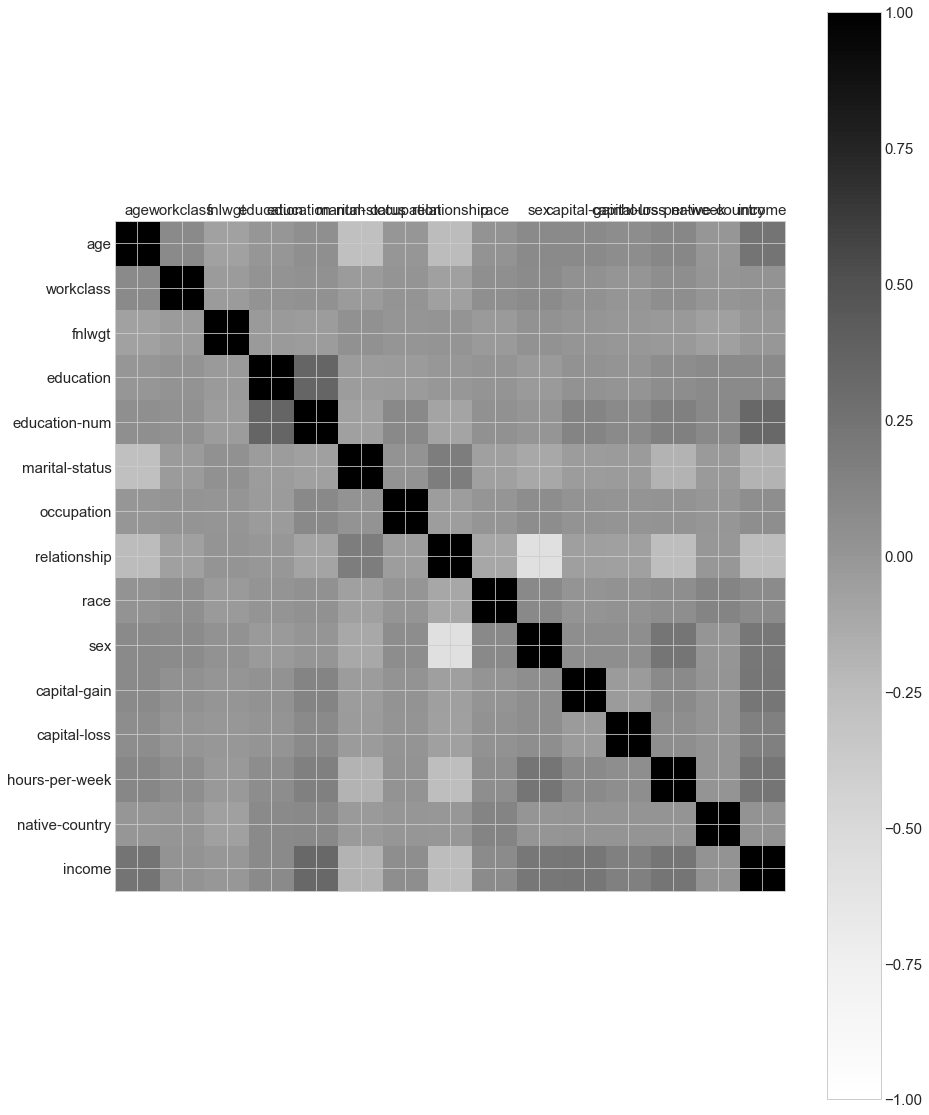

In [66]:
correlations = correlation_data.corr()
plt.rcParams['font.size'] = 15.0
plt.figure(figsize=(30,50))
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, interpolation='nearest')
fig.colorbar(cax)
ticks = np.arange(0,15,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(column_name,size = 15)
ax.set_yticklabels(column_name,size = 15)
plt.show()

# 3. SCATTER PLOT

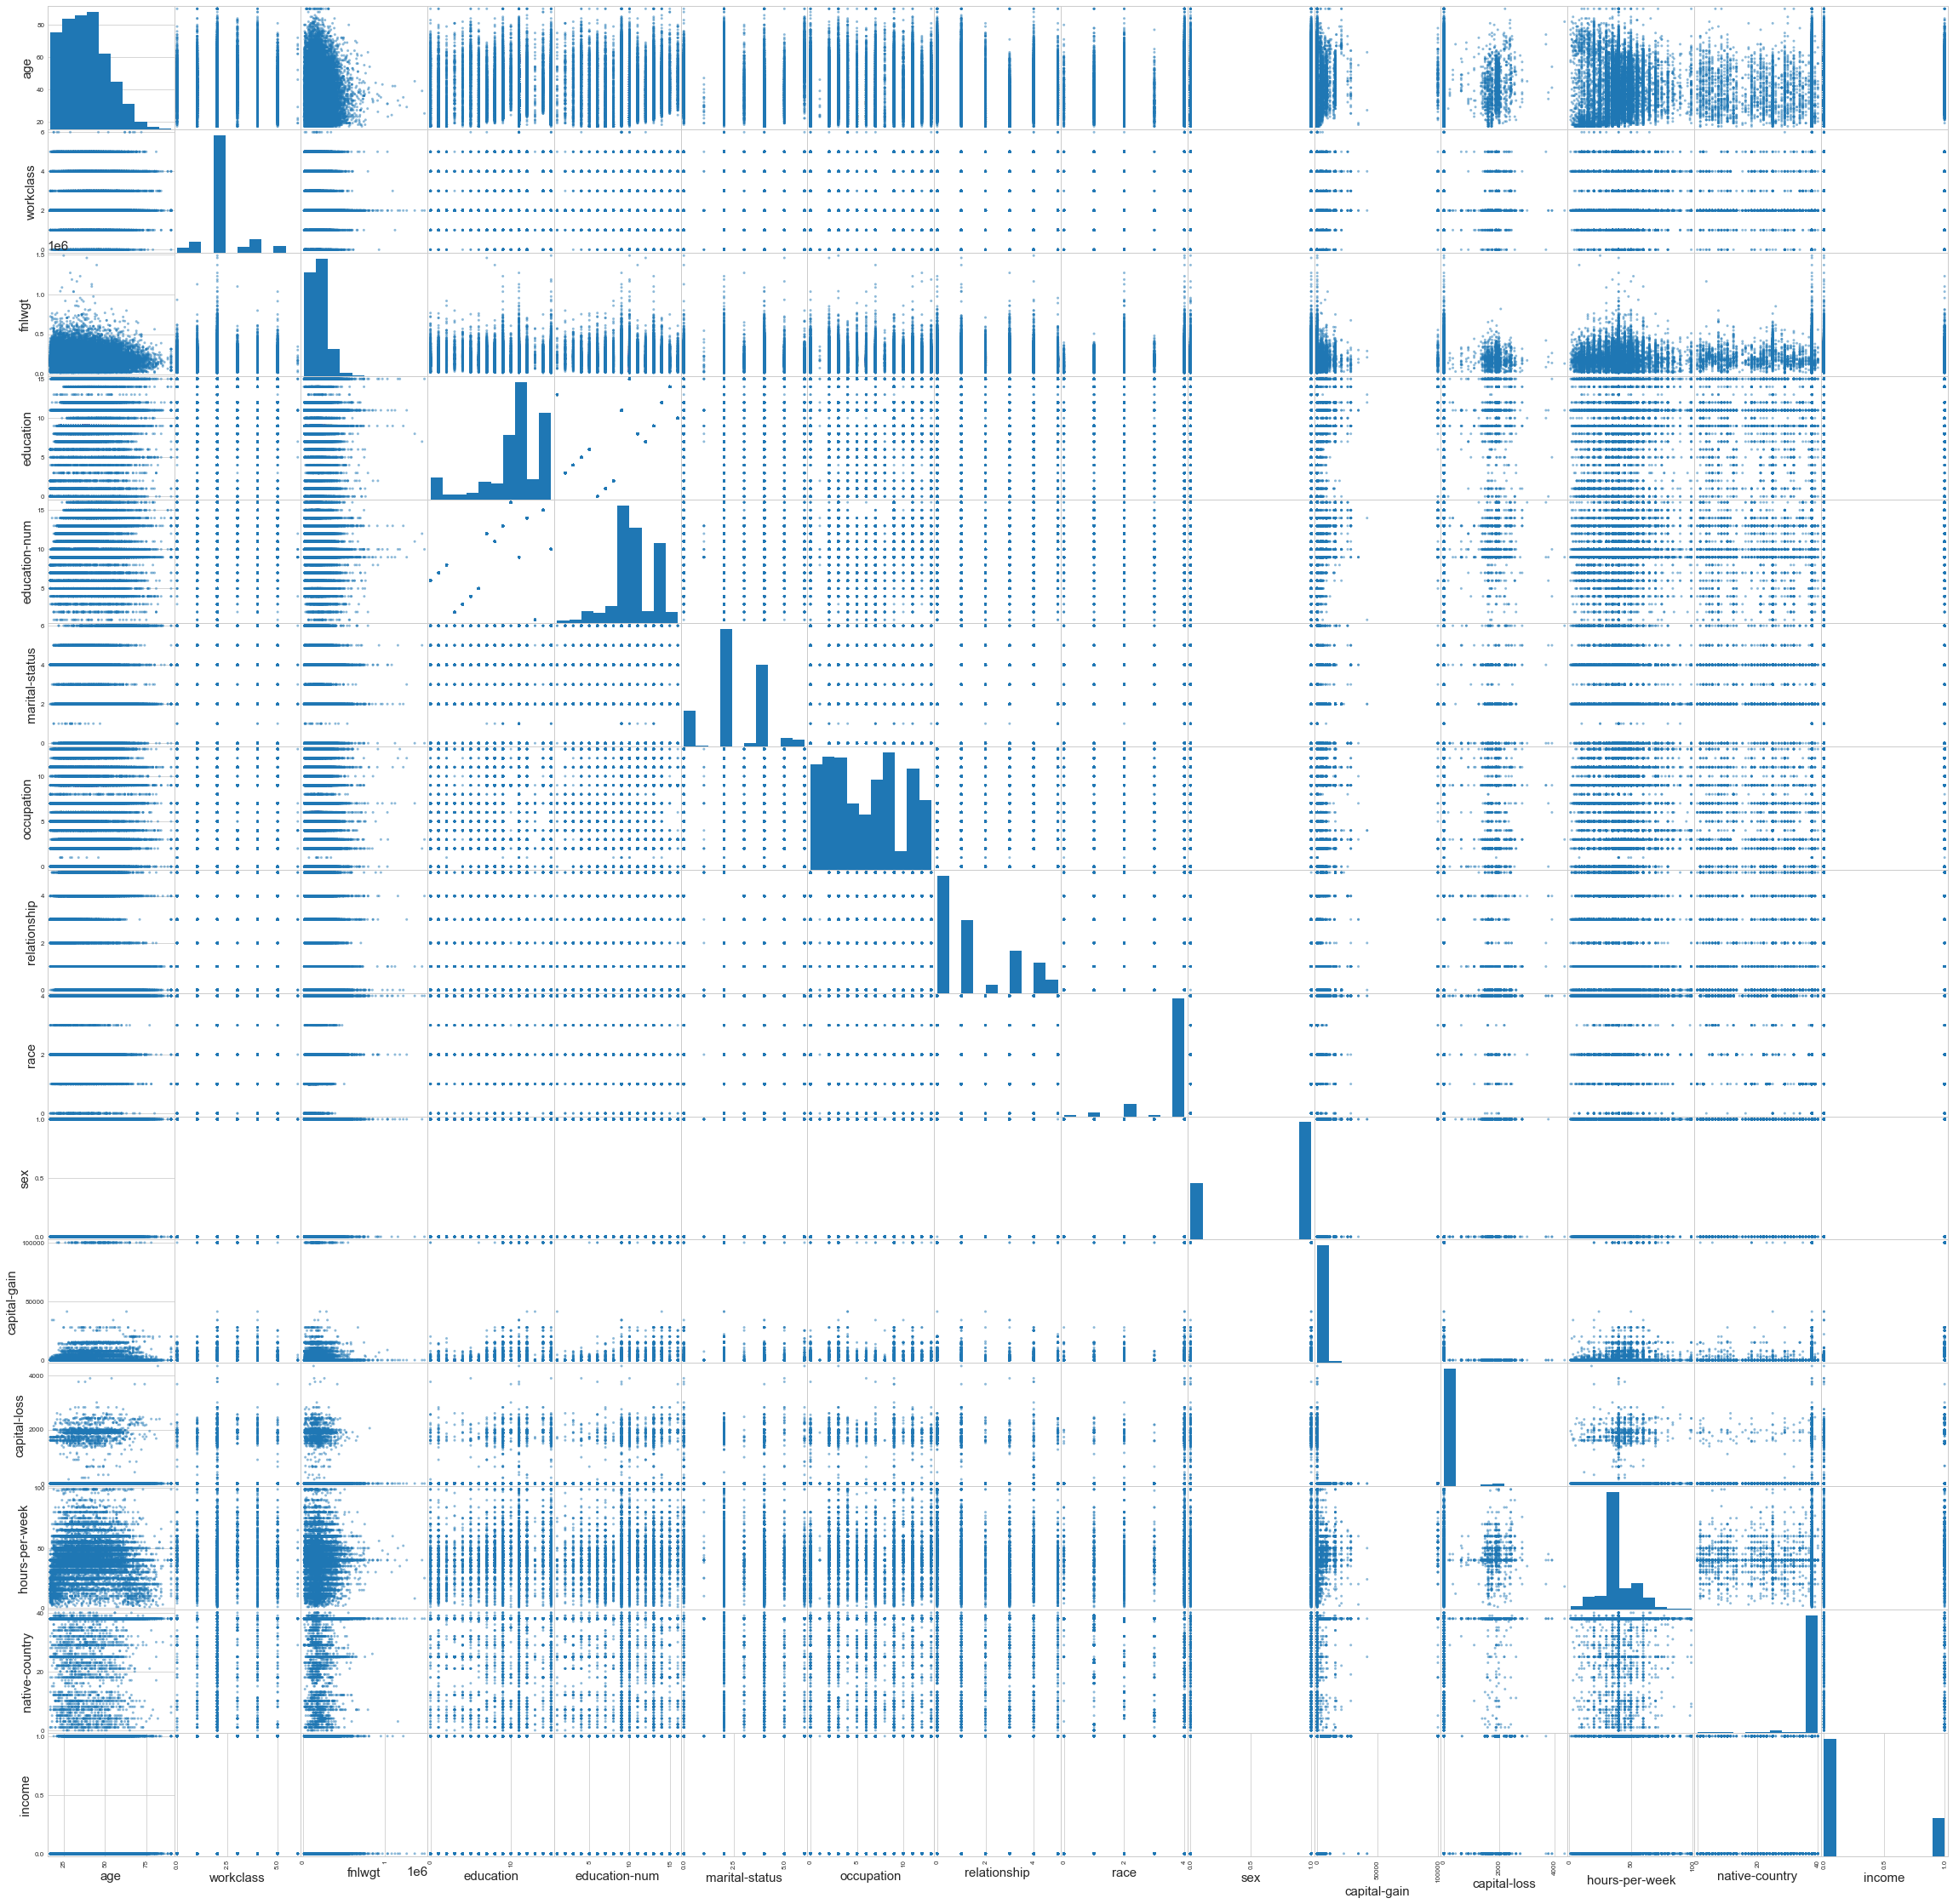

In [67]:
plt.rcParams["figure.figsize"]=40,40
scatter_matrix(correlation_data)
plt.show()

In [68]:
correlation_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


# DATA ANALYSIS

### RELATIONSHIP V/S INCOME

### User Story 1: As a member of the UVW marketing team, I want to know if the Relationship of an individual is a relevant factor in determining their income label so that I can decide whether or not it should be integrated into our team’s prediction  tool.

---



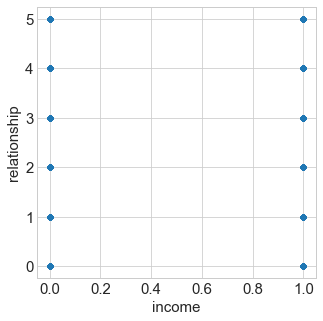

In [69]:
# magnified scatter plot for income v/s relationship
correlation_data.plot.scatter(x='income', y='relationship', figsize = (5,5))

In [70]:
# splitting df based on income

relationship_df_0 = correlation_data[correlation_data['income'] == 0]
relationship_df_0 = relationship_df_0[['income', 'relationship']]

relationship_df_1 = correlation_data[correlation_data['income'] == 1]
relationship_df_1 = relationship_df_1[['income', 'relationship']]

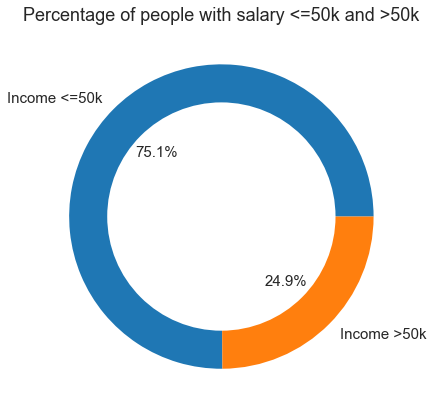

In [71]:
income_labels = ['Income <=50k', 'Income >50k']
income_count = [relationship_df_0.shape[0], relationship_df_1.shape[0]]

fig = plt.figure(figsize=(10,7))
plt.pie(income_count,labels=income_labels,autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.75, fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of people with salary <=50k and >50k')
plt.show()

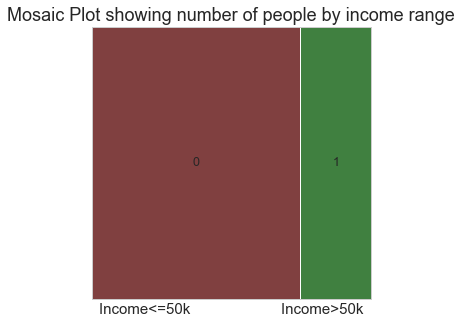

Legend: 
0: Income<=50k 
1: Income>50k


In [72]:
plt.rcParams["figure.figsize"]=(5,5)
mosaic(income_count, axes_label=False)
plt.title('Mosaic Plot showing number of people by income range')
plt.xlabel('Income<=50k                      Income>50k')
plt.show()
print("Legend: \n0: Income<=50k \n1: Income>50k")

**Inference:** Most of the people make <= 50k per year

In [73]:
relationship_mapping = dict(enumerate(adult_data['relationship'].astype('category').cat.categories))
# relationship_labels = [0, 1, 2, 3, 4, 5]

count_by_relationship_0 = [relationship_df_0[relationship_df_0['relationship'] == 0].shape[0], 
                           relationship_df_0[relationship_df_0['relationship'] == 1].shape[0], 
                           relationship_df_0[relationship_df_0['relationship'] == 2].shape[0], 
                           relationship_df_0[relationship_df_0['relationship'] == 3].shape[0], 
                           relationship_df_0[relationship_df_0['relationship'] == 4].shape[0],
                           relationship_df_0[relationship_df_0['relationship'] == 5].shape[0]
                           ]

count_by_relationship_1 = [relationship_df_1[relationship_df_1['relationship'] == 0].shape[0], 
                           relationship_df_1[relationship_df_1['relationship'] == 1].shape[0], 
                           relationship_df_1[relationship_df_1['relationship'] == 2].shape[0], 
                           relationship_df_1[relationship_df_1['relationship'] == 3].shape[0], 
                           relationship_df_1[relationship_df_1['relationship'] == 4].shape[0],
                           relationship_df_1[relationship_df_1['relationship'] == 5].shape[0]
                           ]

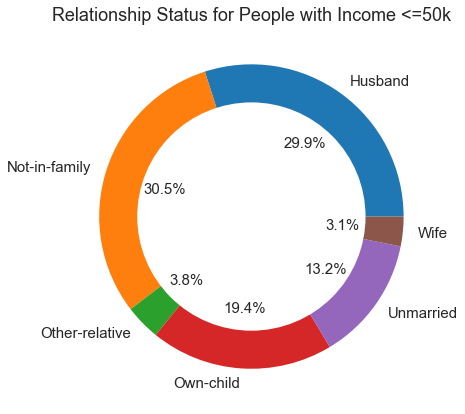

In [74]:
fig = plt.figure(figsize=(10,7))
plt.pie(count_by_relationship_0,labels=relationship_mapping.values(),autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.75, fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship Status for People with Income <=50k')
plt.show()

**Inference:** Most of the people earning <= 50k are either husbands or not in a family.

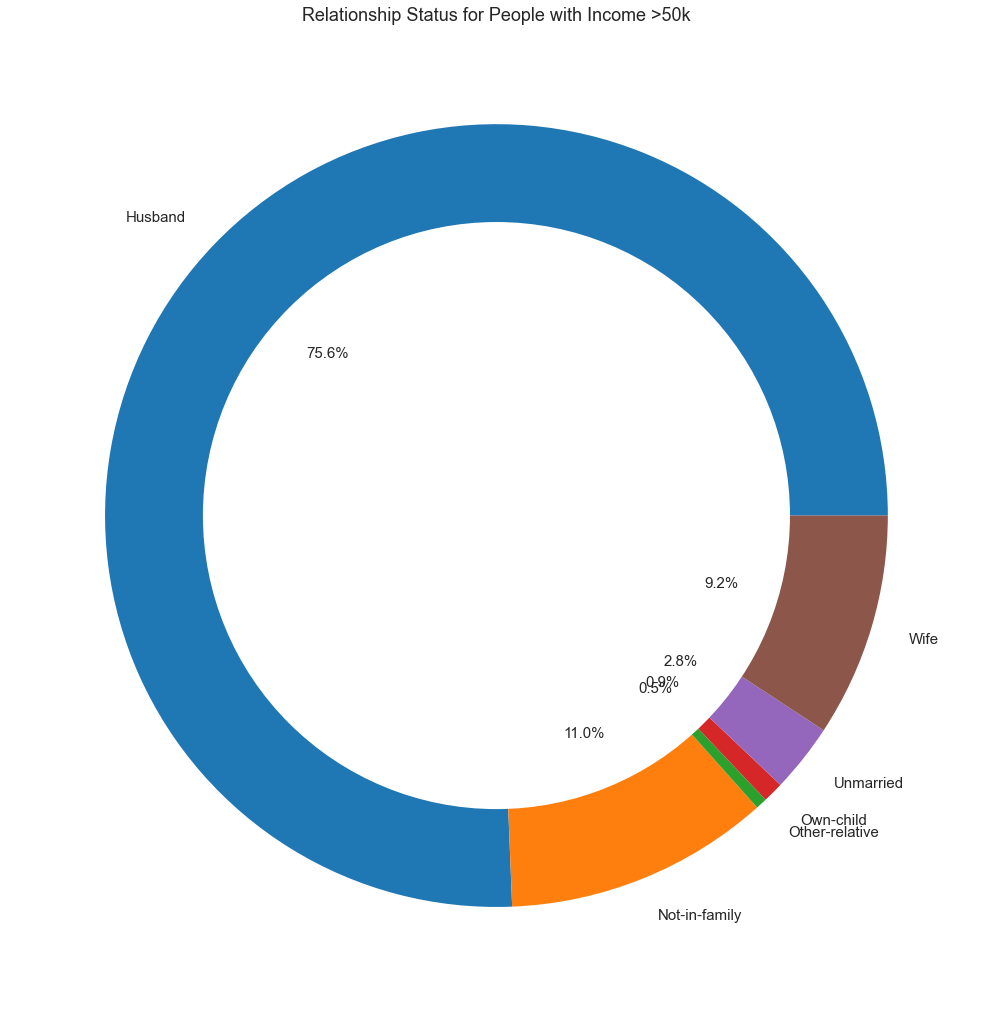

In [75]:
fig = plt.figure(figsize=(20,18))
plt.pie(count_by_relationship_1,labels=relationship_mapping.values(),autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.75, fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship Status for People with Income >50k')
# plt.legend()
plt.show()

**Inference:** More than 3/4th of the people making > 50k are husbands.

### EDUCATION-NUM V/S INCOME

### User Story 2: As a member of the UVW marketing team, I want to know if the EDUCATION-NUM of an individual is a relevant factor in determining their income label so that I can decide whether or not it should be integrated into our team’s prediction  tool.

---


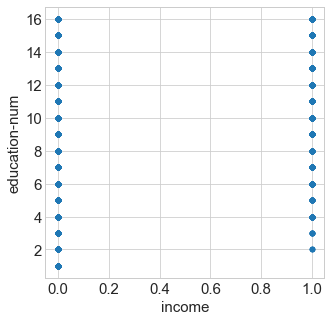

In [76]:
# magnified scatter plot for income v/s education-num
correlation_data.plot.scatter(x='income', y='education-num', figsize = (5,5))
plt.show()

In [77]:
# splitting df based on income

ednum_df_0 = correlation_data[correlation_data['income'] == 0]
ednum_df_0 = ednum_df_0[['income', 'education-num']]

ednum_df_1 = correlation_data[correlation_data['income'] == 1]
ednum_df_1 = ednum_df_1[['income', 'education-num']]

Education-num with Salary <= 50k


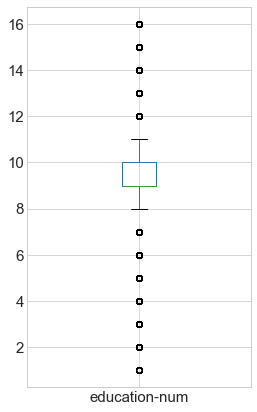

In [78]:
print("Education-num with Salary <= 50k")
ednum_df_0['education-num'].plot.box(figsize = (4,7));

**Inference:** Most people with salary <= 50k have education-num between 8 and 11

Education-num with Salary > 50k


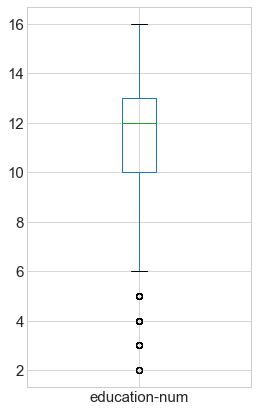

In [79]:
print("Education-num with Salary > 50k")
ednum_df_1['education-num'].plot.box(figsize = (4,7));

**Inference:** Most people with salary > 50k have education-num between X and Y

In [80]:
ednum_all = dict(correlation_data['education-num'].value_counts())
ednum_0 = dict(ednum_df_0['education-num'].value_counts()) # salary <=50k
ednum_1 = dict(ednum_df_1['education-num'].value_counts()) # salary >50k

# adding missing keys for salary > 50k
for key in ednum_all.keys():
  if ednum_all[key]-ednum_0[key] == 0:
    ednum_1[key] = 0

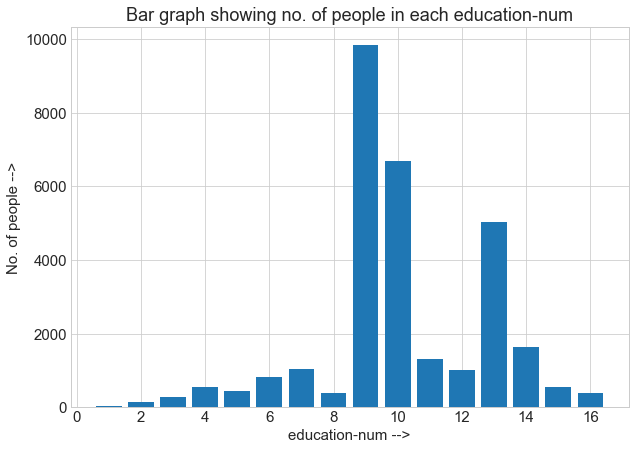

In [81]:
fig = plt.figure(figsize=(10,7))
plt.bar(ednum_all.keys(), ednum_all.values())
plt.title('Bar graph showing no. of people in each education-num')
plt.xlabel('education-num -->')
plt.ylabel('No. of people -->')
plt.show()

**Inference:** 9, 10 and 13 are the most common education-num in the given dataset.

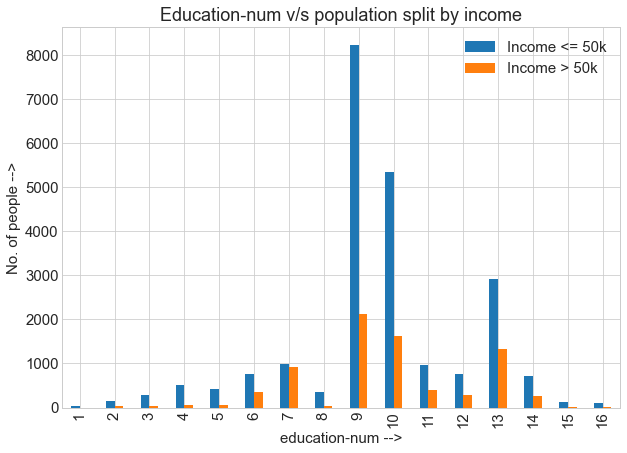

In [82]:
ednum_df = pd.DataFrame(list(zip(ednum_0.values(), ednum_1.values())), columns =['Income <= 50k', 'Income > 50k'], index=ednum_0.keys()).sort_index()
ednum_df.plot.bar(figsize = (10,7))
plt.title('Education-num v/s population split by income')
plt.xlabel('education-num -->')
plt.ylabel('No. of people -->')
plt.show()

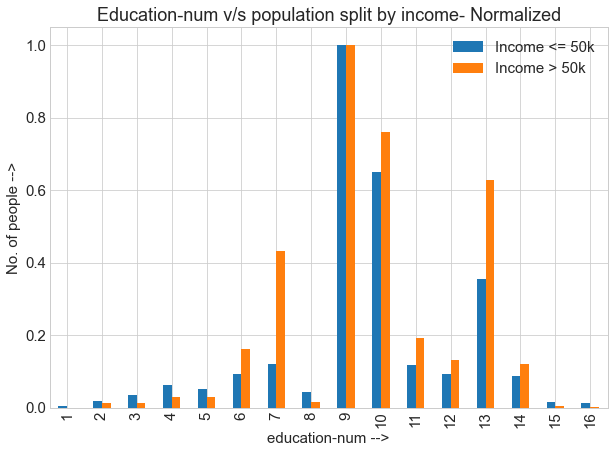

In [83]:
ednum_df_normalized = ednum_df.apply(lambda x: x / x.max())
ednum_df_normalized.plot.bar(figsize = (10,7))
plt.title('Education-num v/s population split by income- Normalized')
plt.xlabel('education-num -->')
plt.ylabel('No. of people -->')
plt.show()

**Inference:** After normalizing the data, we see that the percentage of people in each education-num is almost similar for most of them. The previous graph showed the actual number, which is less as the data is not balanced, i.e. the number of people making <=50k is a lot more (75.1%) than people making >50k (24.9%)

### Education Vs Income

### User Story 3: As a member of the UVW marketing team, I want to know if the EDUCATION of an individual is a relevant factor in determining their income label so that I can decide whether or not it should be integrated into our team’s prediction  tool.

---

In [84]:
income_above_50k_df = adult_data[adult_data['income'] == '>50K']
income_below_50k_df = adult_data[adult_data['income'] == '<=50K']
edu_income_above_50k_df = income_above_50k_df.groupby('education').agg({'income':'count'}).reset_index()
edu_income_below_50k_df = income_below_50k_df.groupby('education').agg({'income':'count'}).reset_index()

edu_income = pd.merge(edu_income_above_50k_df, edu_income_below_50k_df, how="right",on="education")
edu_income = edu_income.fillna(0)

edu_income = edu_income.rename(columns={"income_x": "Income >50K", "income_y": "Income <=50K"})
edu_income = edu_income.set_index('education')
edu_income

,Income >50K,Income <=50K
education,,
10th,59.0,761
11th,59.0,989
12th,29.0,348
1st-4th,6.0,145
5th-6th,12.0,276
7th-8th,35.0,522
9th,25.0,430
Assoc-acdm,256.0,752
Assoc-voc,344.0,963


<Figure size 1296x1080 with 0 Axes>

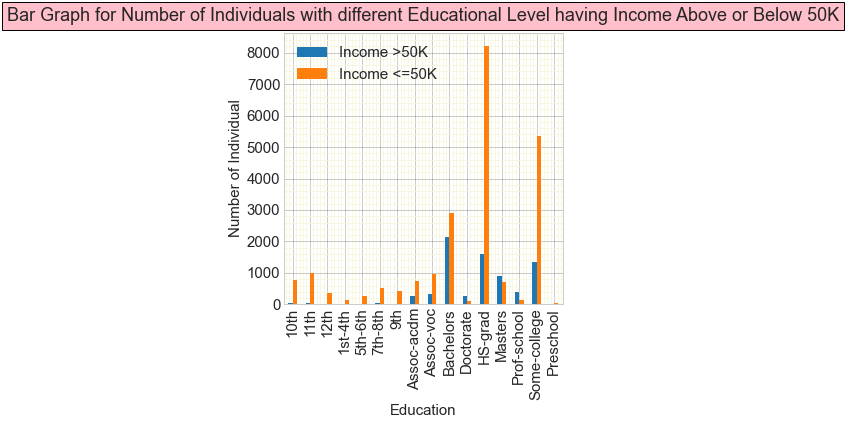

In [85]:
plt.figure(figsize=(18,15))
plt.rcParams['font.size'] = 15.0
axis = edu_income[["Income >50K", "Income <=50K"]].plot(kind="bar", stacked= False)
plt.style.use('seaborn-whitegrid')
plt.ylabel('Number of Individual')
plt.xlabel('Education')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)
plt.grid(b=True, which='major', color='black', alpha=0.2, ls='-', lw=1)
plt.title("Bar Graph for Number of Individuals with different Educational Level having Income Above or Below 50K",y=1.02, bbox={'facecolor':'pink', 'pad':5})
plt.show()

### By simply plotting a stacked bar graph it is seen that number of individuals with income more than 50 k is seen for people with following degrees :
### 1. Doctorate
### 2. Masters
### 3. Prof-school

### But since the number of individuals having income above or below 50 k is quite different, it is necessary to normalize the dataset to compare the result.

In [86]:
edu_income = edu_income.reset_index()

Text(0.5, 1, 'Number of Individuals with Income >50K')

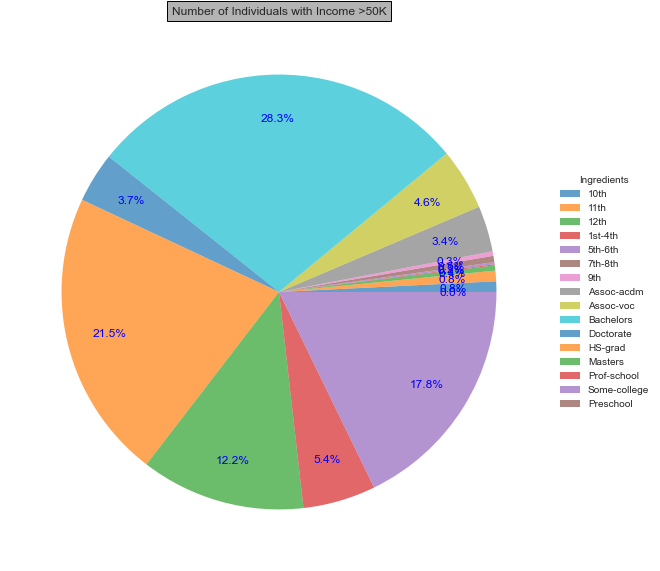

In [87]:
plt.rcParams["figure.figsize"]=12,12
plt.rcParams['font.size'] = 10.0

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(edu_income['Income >50K'],autopct='%1.1f%%',wedgeprops={'alpha':0.7},
                                  textprops=dict(color="b",size = 12),pctdistance = 0.8)

ax.legend(wedges, edu_income['education'],
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Number of Individuals with Income >50K", y=1, bbox={'facecolor':'0.7', 'pad':5})



### This visualization is made for people whose income is above 50K.
### Majority of individuals(5% or above) have the following degree :
### 1. Bachelors - 28.3% 
### 2. HS-grad - 21.5 %
### 3. Some-college - 17.8 %
### 4. Masters - 12.2 %
### 5. Prof-school - 5.4 %

Text(0.5, 1, 'Number of Individuals with Income <=50K')

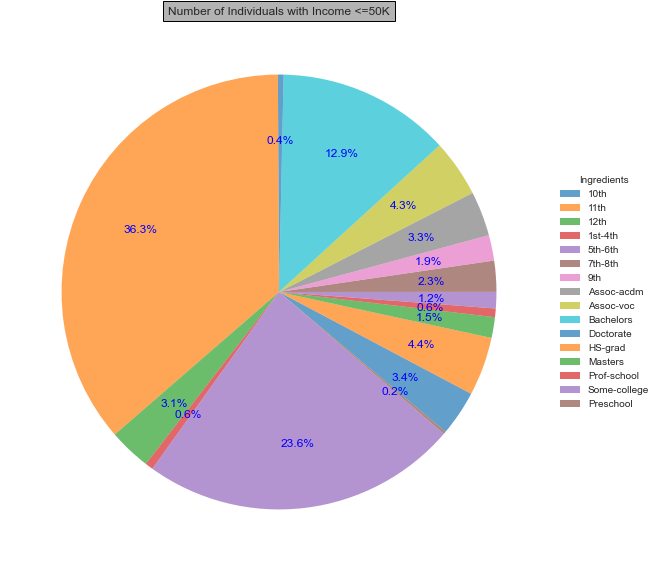

In [88]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(edu_income['Income <=50K'], autopct='%1.1f%%',wedgeprops={'alpha':0.7},
                                  startangle=-40,textprops=dict(color="b",size = 12),pctdistance = 0.7)

ax.legend(wedges, edu_income['education'],
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Number of Individuals with Income <=50K", y=1, bbox={'facecolor':'0.7', 'pad':5})

#### This visualization is made for people whose income is below 50K.
#### Majority of individuals(5% or above) have the following degree :
#### 1. HS-grad - 36.3%
#### 2. Some-college - 23.6 %
#### 3. Bachelors - 12.9 %

###  Marital-status vs income

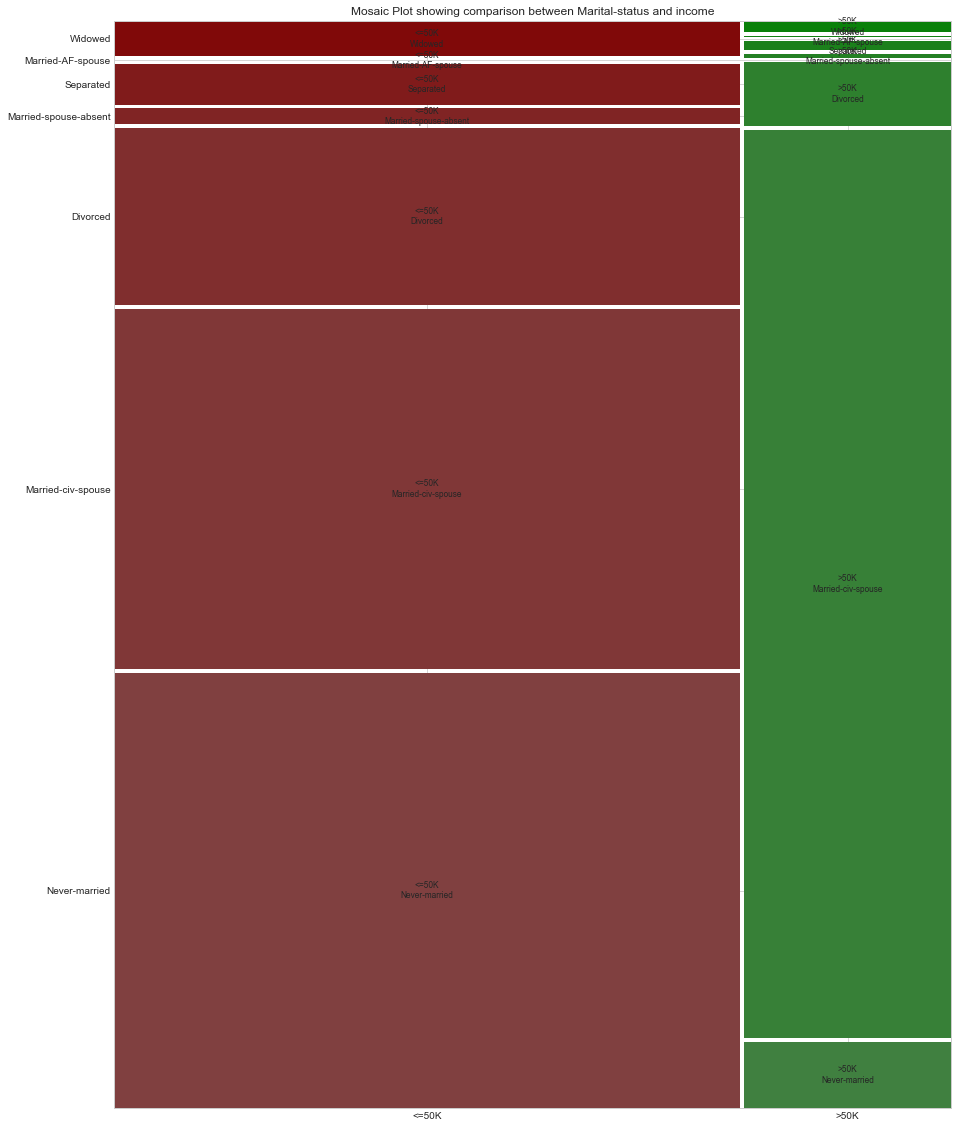

In [89]:
# Comparison marital-status vs income
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams["figure.figsize"]=(15,20)
mosaic(adult_data, ['income','marital-status'])
plt.title('Mosaic Plot showing comparison between Marital-status and income')
plt.show()

###  Captial-gain vs income vs hours-per-week

		 Scatter plot showing the income range comparison with different metrices  


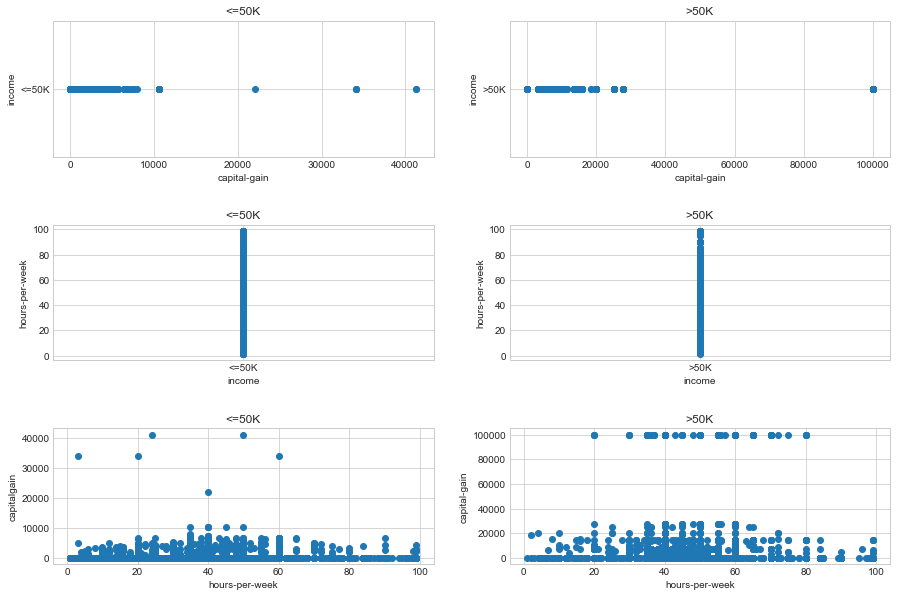

In [90]:
def analyse_Income_CG_HPW():
    plt.close()
    fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15,10))
    fig.subplots_adjust(hspace=.5)
    under_50K = adult_data[adult_data["income"] == "<=50K"]
    over_50K = adult_data[adult_data["income"] == ">50K"]
    x = under_50K['capital-gain']
    y = under_50K['income']
    axes[0, 0].scatter(x,y)
    axes[0, 0].set_title("<=50K")
    axes[0, 0].set_xlabel('capital-gain')
    axes[0, 0].set_ylabel('income')
    x = over_50K['capital-gain']
    y = over_50K['income']
    axes[0, 1].scatter(x,y)
    axes[0, 1].set_title(">50K")
    axes[0, 1].set_xlabel('capital-gain')
    axes[0, 1].set_ylabel('income')
    x = under_50K['income']
    y = under_50K['hours-per-week']
    axes[1, 0].scatter(x,y)
    axes[1, 0].set_title("<=50K")
    axes[1, 0].set_xlabel('income')
    axes[1, 0].set_ylabel('hours-per-week')
    x = over_50K['income']
    y = over_50K['hours-per-week']
    axes[1, 1].scatter(x,y)
    axes[1, 1].set_title(">50K")
    axes[1, 1].set_xlabel('income')
    axes[1, 1].set_ylabel('hours-per-week')
    x = under_50K['hours-per-week']
    y = under_50K['capital-gain']
    axes[2, 0].scatter(x,y)
    axes[2, 0].set_title("<=50K")
    axes[2, 0].set_xlabel('hours-per-week')
    axes[2, 0].set_ylabel('capitalgain')
    x = over_50K['hours-per-week']
    y = over_50K['capital-gain']
    axes[2, 1].scatter(x,y)
    axes[2, 1].set_title(">50K")
    axes[2, 1].set_xlabel('hours-per-week')
    axes[2, 1].set_ylabel('capital-gain')
    
    plt.show()

print('\t\t Scatter plot showing the income range comparison with different metrices  ')
analyse_Income_CG_HPW()